## Hermite1d AstropyModel.

We construct a UserModel implementing the Bessel function of the first kind, order 0: scipy.special.j0()

Demonstration:
1. Astropy Model
2. NestedSampler

In [1]:
import numpy as numpy
import math

from astropy.modeling.polynomial import Hermite1D
from astropy.modeling import FittableModel

from BayesicFitting import AstropyModel
from BayesicFitting import NestedSampler
from BayesicFitting import formatter as fmt
from BayesicFitting import Tools
import matplotlib.pyplot as plt


In [2]:
#%matplotlib osx
%matplotlib inline

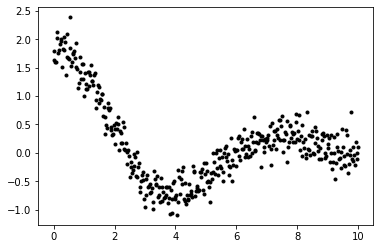

In [3]:
## Make some data. It looks like a Bessel function, but it is not.

npt = 401
t = numpy.linspace( 0, 10, npt, dtype=float )
ym = 2 * numpy.sin( 2 * math.pi * ( t / 7  ) + 1 ) * numpy.exp( - t / 4 )
y = numpy.random.seed( 12345 )
y = ym + numpy.random.randn( npt ) * 0.2
plt.plot( t, y, 'k.' )
plt.show()

In [4]:
## Define a 3rd oder Hermite Polynomial from Astropy
herm = Hermite1D( 3 )
print( herm)


Model: Hermite1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Degree: 3
Parameters:
     c0  c1  c2  c3
    --- --- --- ---
    0.0 0.0 0.0 0.0


In [5]:
## Insert it in a AstropyModel and set limits; one set, valid for all parameters
model = AstropyModel( herm )
print( model )
model.setLimits( [-10], [10] ) 

AstropyModel( Hermite1D )


Fit all parameters of
  AstropyModel( Hermite1D )
Using a Gauss error distribution with unknown scale
Moving the walkers with   GalileanEngine  ChordEngine
Iteration     logZ        H       LowL     npar parameters                           scale
       0  -4.72e+14 115102942657296.6  -3.57e+14      5  [    7.683    6.678    2.567    5.002    0.010]
     100  -5.58e+11 1866484955.4  -5.56e+11      5  [    0.428   -9.551    6.309   -1.742    0.079]
     200  -5.85e+10 2376664622.3  -5.61e+10      5  [    0.452    6.350   -5.775   -4.941    0.914]
     300  -1.20e+10 312095003.9  -1.17e+10      5  [    0.033    0.250    4.881   -1.937    0.633]
     400  -1.95e+09 24605424.8  -1.93e+09      5  [   -5.416    5.056    5.733   -0.066    0.282]
     500  -3.30e+08 3819652.1  -3.27e+08      5  [   -2.915   -4.916   -8.506    0.540    0.225]
     600  -7.72e+07 1345752.8  -7.59e+07      5  [   -9.606   -0.928    6.318   -0.479    0.613]
     700  -3.09e+07   2879.6  -3.09e+07      5  [    6.76

    8300      -119.     42.9      -70.9      5  [    2.807   -0.934    0.085   -0.002    0.286]
    8400      -119.     42.9      -70.9      5  [    2.806   -0.933    0.085   -0.002    0.285]
    8500      -119.     42.9      -70.9      5  [    2.805   -0.933    0.085   -0.002    0.285]
    8582      -119.     42.9      -70.9      5 
[    2.806   -0.933    0.085   -0.002    0.286]
Engines              success     reject     failed       best      calls
GalileanEngine         49255      19727      26010          0       8586
ChordEngine            59862     598533         73          0       8586
Calls to LogL         753460   to dLogL      19727
Samples        8682
Evidence       -51.663 +-      0.284


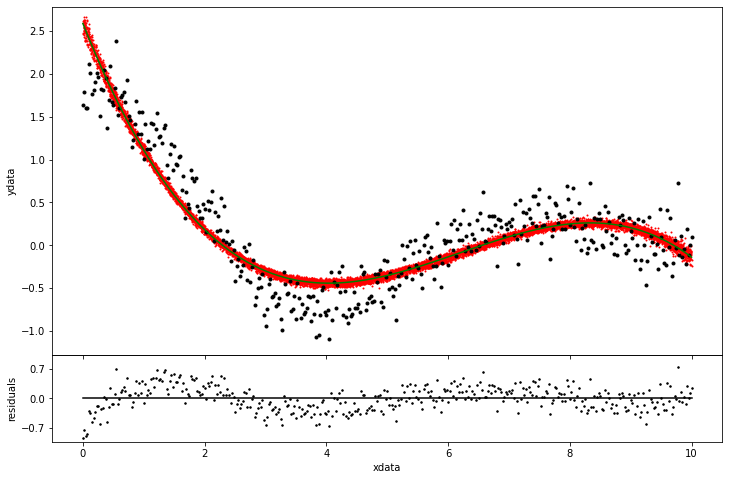

In [6]:
ns = NestedSampler( t, model, y )
ns.distribution.setLimits( [0.01, 1] )
ns.verbose = 2
evi = ns.sample( plot=True )

In [7]:
sl = ns.samples
kmed = sl.getMedianIndex()
smpl = sl[kmed]
print( fmt( smpl.model.parameters, max=None ) )
print( fmt( sl[-1].model.parameters, max=None ) )

[    2.755   -0.909    0.082   -0.002]
[    2.755   -0.909    0.082   -0.002]
